In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter

In [2]:
with open('merged_factors.pkl', 'rb') as f:
    merged_factors = pickle.load(f)

In [61]:
with open('sectorMapping.pkl', 'rb') as f:
    sectorMapping = pickle.load(f)

In [64]:
sectorCode = [sectorMapping[asset[:asset.find('.')] if asset.find('.') != -1 else asset] for asset in merged_factors['assetCode']]
merged_factors['sectorCode'] = sectorCode

In [67]:
merged_factors[['assetCode','returnsOpenNextMktres10_x']]

assetCode  returnsOpenNextMktres10_x
0             A.N                   0.034672
1           AAI.N                   0.027803
2           AAP.N                   0.024433
3          AAPL.O                  -0.007425
4           ABB.N                  -0.017994
5           ABC.N                   0.058680
6           ABD.N                  -0.044285
7           ABM.N                   0.016578
8           ABT.N                   0.009861
9           ABV.N                   0.012917
10          ABY.N                   0.016963
11          ACF.N                  -0.010287
12          ACH.N                   0.041577
13          ACL.N                   0.084964
14          ACS.N                   0.084406
15         ACTS.O                  -0.097518
16         ACXM.O                  -0.052526
17           AD.N                   0.001977
18         ADBE.O                   0.010287
19         ADCT.O                   0.052668
20          ADI.N                  -0.010782
21          ADM.N                  -0.006716
22          ADP.N                   0.030656
23          ADS.N                  -0.042951
24         ADSK.O                  -0.056126
25         ADTN.O                   0.064734
26          AEA.N                   0.030226
27          AEE.N                  -0.009333
28          AEG.N                  -0.014691
29         AEIS.O                   0.085302
...           ...                        ...
4064804    XLNX.O                  -0.072078
4064805    XLRN.O                  -0.020768
4064806    XNCR.O                  -0.122284
4064807     XOG.O                  -0.080657
4064808     XOM.N                  -0.057035
4064809     XON.N                   0.003620
4064810     XPO.N                  -0.010168
4064811    XRAY.O                  -0.014616
4064812    XXIA.O                   0.011636
4064813     XYL.N                  -0.030040
4064814    YELP.N                   0.072670
4064815    YHOO.O                   0.087102
4064816    YNDX.O                   0.056161
4064817     YPF.N                   0.288102
4064818     YRD.N                  -0.002232
4064819     YUM.N                   0.012008
4064820    YUMC.N                   0.018680
4064821      YY.O                   0.067917
4064822       Z.O                  -0.019932
4064823    ZAYO.N                  -0.031742
4064824     ZBH.N                   0.115330
4064825    ZBRA.O                  -0.059977
4064826     ZEN.N                   0.036856
4064827      ZG.O                  -0.018969
4064828    ZION.O                  -0.045221
4064829    ZIOP.O                   0.051189
4064830    ZLTQ.O                  -0.048555
4064831    ZNGA.O                   0.011703
4064832     ZTO.N                   0.083367
4064833     ZTS.N                  -0.016220

[4064834 rows x 2 columns]

### Calculate volatility and test 

In [68]:
merged_factors = merged_factors.sort_values(['assetCode', 'time'], ascending=[True, True]).reset_index()

In [69]:
def volatility( df, window ):
    df['vol'+str(window)] = df['returnsOpenNextMktres10_x'].rolling(window+1).apply(lambda x:np.std(x[:-1]))

In [70]:
volatility( merged_factors, 5 )

C:\Users\georg\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [72]:
volatility( merged_factors, 10 )

C:\Users\georg\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [73]:
volatility( merged_factors, 20 )

C:\Users\georg\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [75]:
merged_factors[['vol5','vol10','vol20']]

vol5     vol10     vol20
0             NaN       NaN       NaN
1             NaN       NaN       NaN
2             NaN       NaN       NaN
3             NaN       NaN       NaN
4             NaN       NaN       NaN
5        0.012036       NaN       NaN
6        0.008784       NaN       NaN
7        0.010539       NaN       NaN
8        0.009153       NaN       NaN
9        0.016026       NaN       NaN
10       0.013517  0.016893       NaN
11       0.012927  0.017494       NaN
12       0.018844  0.017457       NaN
13       0.019686  0.017657       NaN
14       0.017880  0.017046       NaN
15       0.017415  0.016007       NaN
16       0.006186  0.015236       NaN
17       0.003579  0.015755       NaN
18       0.003438  0.015927       NaN
19       0.015243  0.018529       NaN
20       0.015059  0.017960  0.017540
21       0.015443  0.014551  0.018377
22       0.017668  0.015262  0.018235
23       0.015862  0.015342  0.018407
24       0.017911  0.016667  0.018657
25       0.020484  0.018310  0.018828
26       0.012256  0.018034  0.018748
27       0.012747  0.018022  0.018606
28       0.008326  0.018702  0.018719
29       0.012329  0.016275  0.017621
...           ...       ...       ...
4064804  0.006107  0.058968  0.130801
4064805  0.013557  0.057515  0.131301
4064806  0.025960  0.059693  0.137142
4064807  0.038947  0.066812  0.144147
4064808  0.039911  0.052243  0.145097
4064809  0.048065  0.035656  0.134026
4064810  0.041600  0.035775  0.118933
4064811  0.077162  0.057911  0.094872
4064812  0.079835  0.072398  0.088029
4064813  0.084396  0.096888  0.086752
4064814  0.083075  0.108299  0.087686
4064815  0.108381  0.115382  0.091399
4064816  0.112331  0.110446  0.090774
4064817  0.111688  0.101643  0.092212
4064818  0.097747  0.093676  0.089398
4064819  0.066531  0.093059  0.087630
4064820  0.039743  0.087689  0.087350
4064821  0.053457  0.093373  0.088061
4064822  0.037864  0.091049  0.087502
4064823  0.084976  0.096629  0.096762
4064824  0.095973  0.088614  0.103002
4064825  0.077800  0.085850  0.103901
4064826  0.082501  0.094432  0.108972
4064827  0.043135  0.083280  0.109453
4064828  0.064903  0.084742  0.107822
4064829  0.059738  0.080563  0.108354
4064830  0.063289  0.071093  0.108260
4064831  0.040662  0.070997  0.105587
4064832  0.033739  0.060138  0.102839
4064833  0.074392  0.080058  0.095051

[4064834 rows x 3 columns]

In [89]:
merged_factors.columns

Index(['index', 'Unnamed: 0', 'time', 'assetCode', 'assetName', 'volume',
       'close', 'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       ...
       'news_novelty_sum_7D', 'returnsOpenNextMktres10_y',
       'news_coverage_flag', 'random_factor', 'assetCodeLength',
       'intraday_return', 'sectorCode', 'vol5', 'vol10', 'vol20'],
      dtype='object', length=108)

In [88]:
merged_factors = merged_factors.drop(columns=['level_0'])

In [91]:
#merged_factors.reset_index(drop=True,inplace=True)
merged_factors = merged_factors.sort_values(['time', 'assetCode'], ascending=[True, True]).reset_index()

In [92]:
merged_factors[['vol5','vol10','vol20']]

vol5     vol10     vol20
0             NaN       NaN       NaN
1        0.034595  0.054303  0.042848
2        0.022487  0.020398  0.031681
3        0.005378  0.014463  0.022161
4        0.021285  0.018208  0.021546
5        0.015218  0.020001  0.018880
6        0.071888  0.095439  0.109375
7        0.007610  0.021149  0.036716
8        0.010937  0.016967  0.031221
9        0.003573  0.019447  0.044077
10       0.013824  0.041231  0.104637
11       0.019883  0.024857  0.077630
12       0.005356  0.008607  0.016418
13       0.010917  0.015878  0.051853
14       0.030388  0.056311  0.136371
15       0.104922  0.086965  0.083157
16       0.033968  0.035749  0.029379
17       0.004228  0.010260  0.026465
18       0.001427  0.001087  0.007505
19       0.019301  0.017351  0.028253
20       0.000676  0.001203  0.001774
21       0.006939  0.011677  0.016341
22       0.015337  0.032288  0.048715
23       0.022519  0.062587  0.160235
24       0.012789  0.011697  0.012818
25       0.001712  0.003001  0.138789
26       0.006400  0.005578  0.006322
27       0.001198  0.001780  0.001539
28       0.004440  0.012799  0.028263
29       0.025322  0.050744  0.063906
...           ...       ...       ...
4064804  0.015481  0.028157  0.054485
4064805  0.037418  0.057999  0.113164
4064806  0.021979  0.030320  0.085822
4064807  0.007451  0.017584  0.047343
4064808  0.008000  0.022829  0.026341
4064809  0.027755  0.058290  0.082964
4064810  0.011513  0.021450  0.037846
4064811  0.008340  0.007267  0.014034
4064812  0.012840  0.012292  0.049925
4064813  0.004585  0.010618  0.045962
4064814  0.035208  0.031065  0.052966
4064815  0.005606  0.031309  0.064918
4064816  0.015235  0.019507  0.035330
4064817  0.039414  0.118062  0.166247
4064818  0.021021  0.074439  0.096712
4064819  0.003651  0.010199  0.014555
4064820  0.010972  0.013206  0.029595
4064821  0.029868  0.040851  0.038073
4064822  0.018397  0.017159  0.036386
4064823  0.012633  0.029134  0.033384
4064824  0.009571  0.043325  0.050353
4064825  0.015375  0.021510  0.028042
4064826  0.011275  0.047449  0.065134
4064827  0.014502  0.014507  0.041439
4064828  0.005646  0.018953  0.025196
4064829  0.050910  0.079777  0.076669
4064830  0.012456  0.036052  0.045412
4064831  0.017002  0.029901  0.051934
4064832  0.027303  0.051300  0.068441
4064833  0.009589  0.014894  0.024693

[4064834 rows x 3 columns]

### Test the performance of risk parity


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5


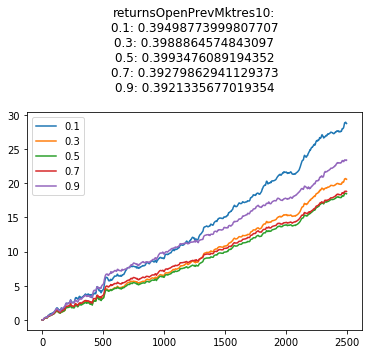


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5


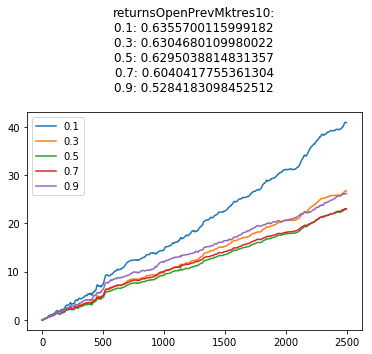


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5


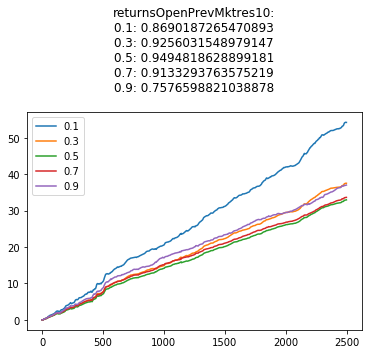


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5


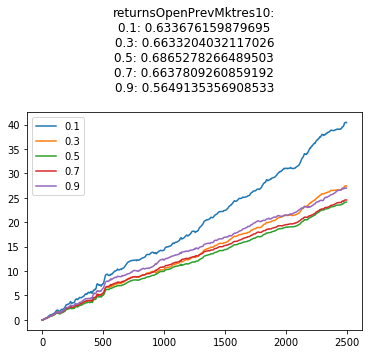

{0.1: 0.633676159879695,
 0.3: 0.6633204032117026,
 0.5: 0.6865278266489503,
 0.7: 0.6637809260859192,
 0.9: 0.5649135356908533}

In [100]:
single_factor_eva(merged_factors, 'returnsOpenPrevMktres10', all_on=True )
single_factor_eva(merged_factors, 'returnsOpenPrevMktres10', all_on=True, vol = 'vol5')
single_factor_eva(merged_factors, 'returnsOpenPrevMktres10', all_on=True, vol = 'vol10')
single_factor_eva(merged_factors, 'returnsOpenPrevMktres10', all_on=True, vol = 'vol20')


 *** evaluating factor : returnsCloseMA20  with cut-off 0.5


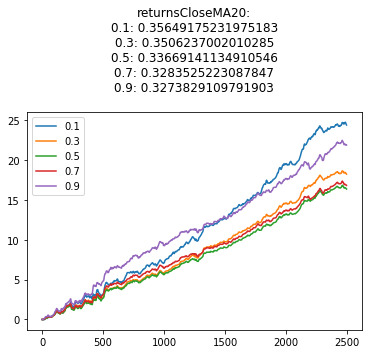


 *** evaluating factor : returnsCloseMA20  with cut-off 0.5


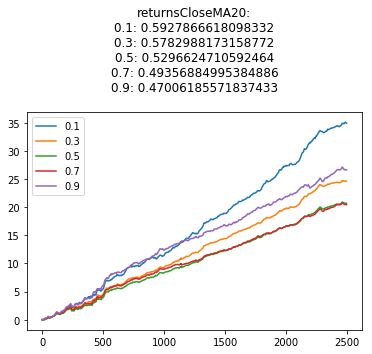


 *** evaluating factor : returnsCloseMA20  with cut-off 0.5


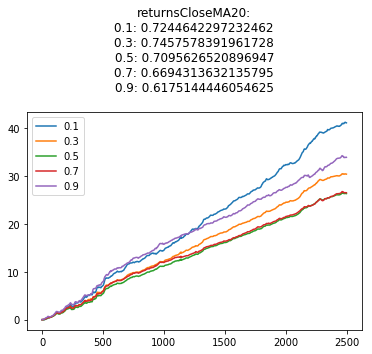


 *** evaluating factor : returnsCloseMA20  with cut-off 0.5


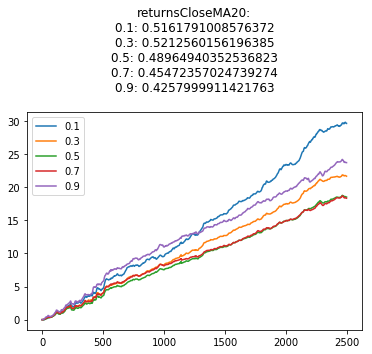

{0.1: 0.5161791008576372,
 0.3: 0.5212560156196385,
 0.5: 0.48964940352536823,
 0.7: 0.45472357024739274,
 0.9: 0.4257999911421763}

In [101]:
signal = 'returnsCloseMA20'
single_factor_eva(merged_factors, signal, all_on=True )
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol5')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol10')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol20')


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.5


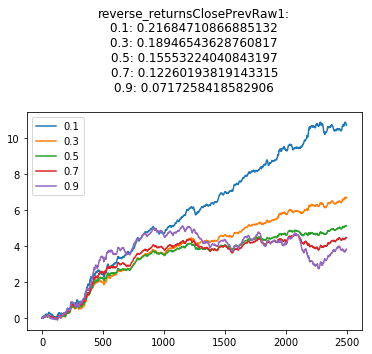


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.5


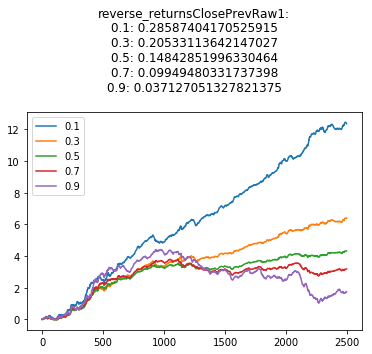


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.5


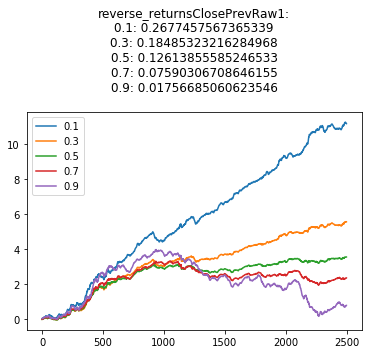


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.5


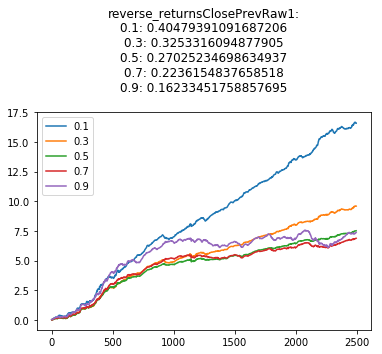

{0.1: 0.40479391091687206,
 0.3: 0.3253316094877905,
 0.5: 0.27025234698634937,
 0.7: 0.2236154837658518,
 0.9: 0.16233451758857695}

In [102]:
signal = 'reverse_returnsClosePrevRaw1'
single_factor_eva(merged_factors, signal, all_on=True )
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol5')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol10')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol20')


 *** evaluating factor : intraday_return  with cut-off 0.5


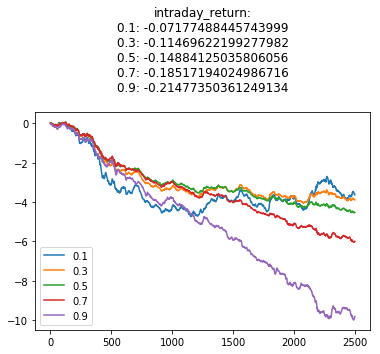


 *** evaluating factor : intraday_return  with cut-off 0.5


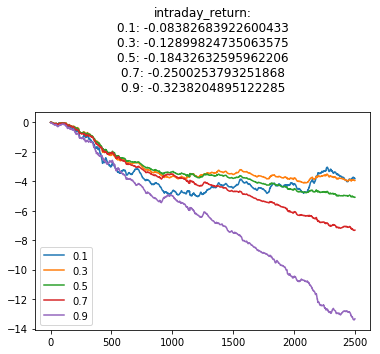


 *** evaluating factor : intraday_return  with cut-off 0.5


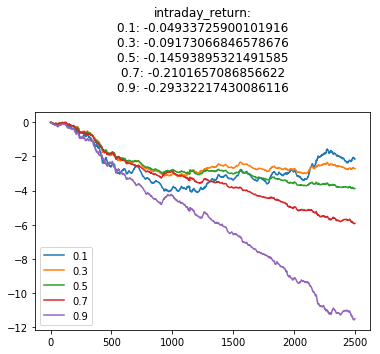


 *** evaluating factor : intraday_return  with cut-off 0.5


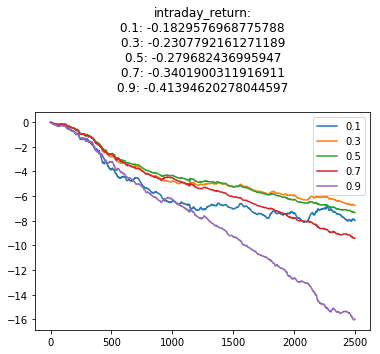

{0.1: -0.1829576968775788,
 0.3: -0.2307792161271189,
 0.5: -0.279682436995947,
 0.7: -0.3401900311916911,
 0.9: -0.41394620278044597}

In [104]:
signal = 'intraday_return'
single_factor_eva(merged_factors, signal, all_on=True )
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol5')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol10')
single_factor_eva(merged_factors, signal, all_on=True, vol = 'vol20')

### Run risk parity report for all factors

In [105]:
market_cutoff_dict

{'returnsClosePrevRaw1': {0.1: -0.07198088841350529,
  0.3: -0.12267579581297357,
  0.5: -0.15548727694356732,
  0.7: -0.18953440322342108,
  0.9: -0.2166598336131493},
 'returnsOpenPrevRaw1': {0.1: 0.0015038466582985978,
  0.3: -0.02509478772087462,
  0.5: -0.061686293514643165,
  0.7: -0.09203724578930131,
  0.9: -0.1018839033667491},
 'returnsClosePrevMktres1': {0.1: -0.06529773120574964,
  0.3: -0.1037557624550156,
  0.5: -0.148954452722898,
  0.7: -0.18015062452889874,
  0.9: -0.20838061162326424},
 'returnsOpenPrevMktres1': {0.1: 0.026154518624398243,
  0.3: 0.006793769276280365,
  0.5: -0.02329301604913067,
  0.7: -0.05156242387202518,
  0.9: -0.07463254260607927},
 'returnsClosePrevRaw10': {0.1: 0.3177881112802861,
  0.3: 0.30018823191017535,
  0.5: 0.2827018057228056,
  0.7: 0.2666092131049324,
  0.9: 0.27182453377270643},
 'returnsOpenPrevRaw10': {0.1: 0.3718700609015396,
  0.3: 0.3503917387130919,
  0.5: 0.33607159123183555,
  0.7: 0.3192208476729925,
  0.9: 0.32740570282647


 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.9 with volality measure vol20


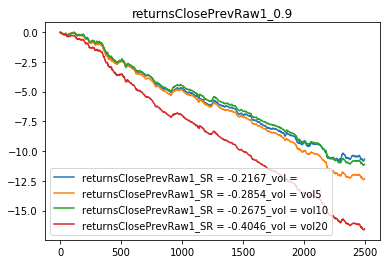


 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol20


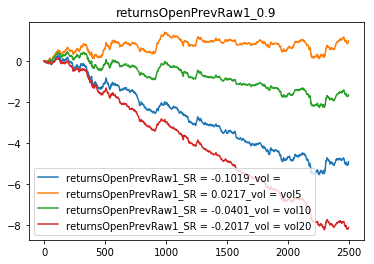


 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.9 with volality measure vol20


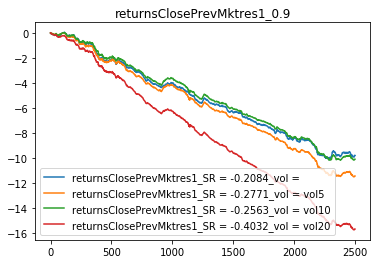


 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol20


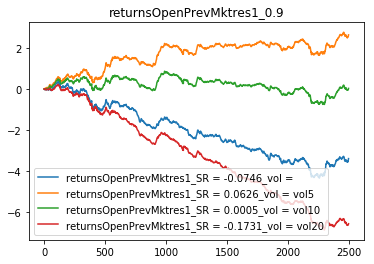


 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.1 with volality measure 

 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.1 with volality measure vol20


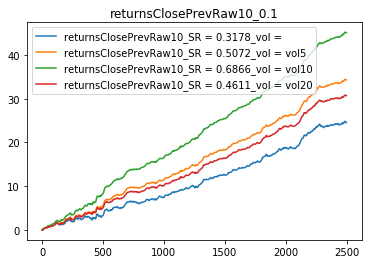


 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.1 with volality measure 

 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.1 with volality measure vol20


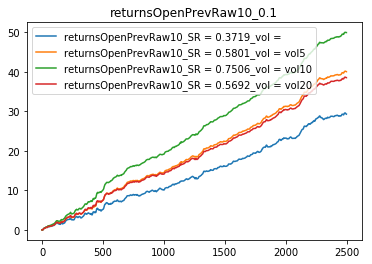


 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.3 with volality measure 

 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.3 with volality measure vol20


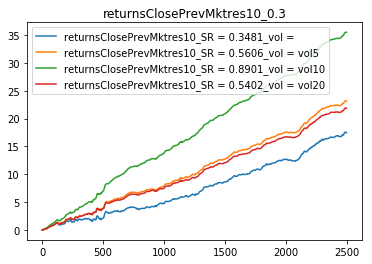


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5 with volality measure 

 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5 with volality measure vol20


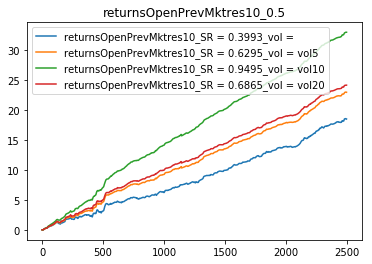


 *** evaluating factor : returnsOpenNextMktres10_x  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsOpenNextMktres10_x  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsOpenNextMktres10_x  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsOpenNextMktres10_x  with cut-off 0.9 with volality measure vol20


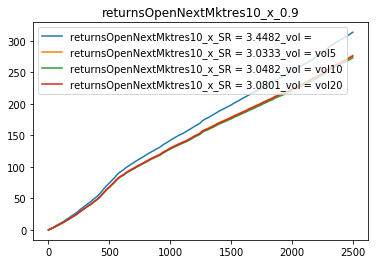


 *** evaluating factor : returnsVolumePrev1  with cut-off 0.3 with volality measure 

 *** evaluating factor : returnsVolumePrev1  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : returnsVolumePrev1  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : returnsVolumePrev1  with cut-off 0.3 with volality measure vol20


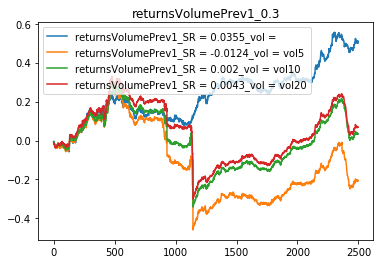


 *** evaluating factor : returnsVolumePrev10  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsVolumePrev10  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsVolumePrev10  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsVolumePrev10  with cut-off 0.9 with volality measure vol20


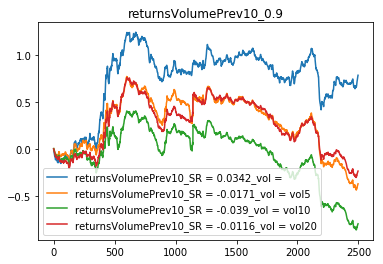


 *** evaluating factor : CloseMA5  with cut-off 0.5 with volality measure 

 *** evaluating factor : CloseMA5  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : CloseMA5  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : CloseMA5  with cut-off 0.5 with volality measure vol20


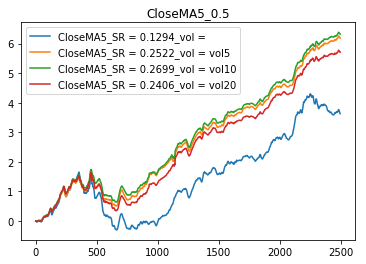


 *** evaluating factor : CloseMA10  with cut-off 0.5 with volality measure 

 *** evaluating factor : CloseMA10  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : CloseMA10  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : CloseMA10  with cut-off 0.5 with volality measure vol20


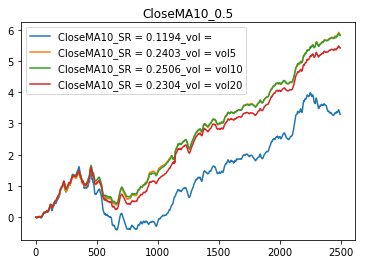


 *** evaluating factor : CloseMA20  with cut-off 0.5 with volality measure 

 *** evaluating factor : CloseMA20  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : CloseMA20  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : CloseMA20  with cut-off 0.5 with volality measure vol20


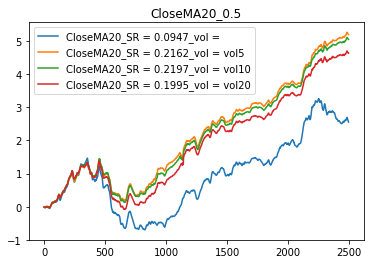


 *** evaluating factor : returnsCloseMA5  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsCloseMA5  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsCloseMA5  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsCloseMA5  with cut-off 0.9 with volality measure vol20


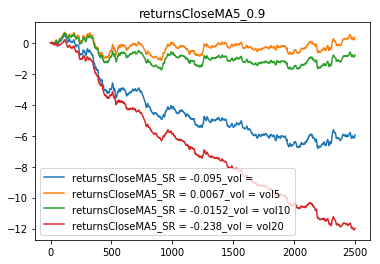


 *** evaluating factor : returnsCloseMA10  with cut-off 0.1 with volality measure 

 *** evaluating factor : returnsCloseMA10  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : returnsCloseMA10  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : returnsCloseMA10  with cut-off 0.1 with volality measure vol20


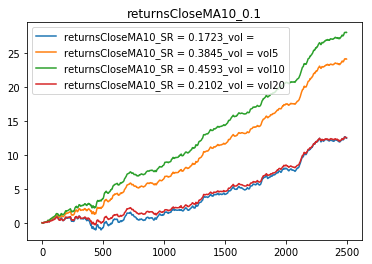


 *** evaluating factor : returnsCloseMA20  with cut-off 0.1 with volality measure 

 *** evaluating factor : returnsCloseMA20  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : returnsCloseMA20  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : returnsCloseMA20  with cut-off 0.1 with volality measure vol20


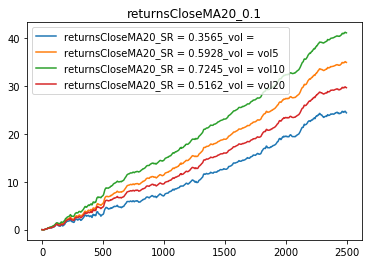


 *** evaluating factor : VolumeMA5  with cut-off 0.7 with volality measure 

 *** evaluating factor : VolumeMA5  with cut-off 0.7 with volality measure vol5

 *** evaluating factor : VolumeMA5  with cut-off 0.7 with volality measure vol10

 *** evaluating factor : VolumeMA5  with cut-off 0.7 with volality measure vol20


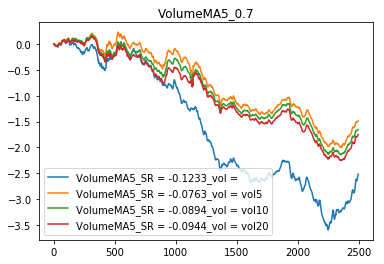


 *** evaluating factor : VolumeMA10  with cut-off 0.9 with volality measure 

 *** evaluating factor : VolumeMA10  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : VolumeMA10  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : VolumeMA10  with cut-off 0.9 with volality measure vol20


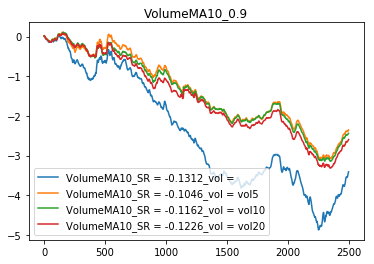


 *** evaluating factor : VolumeMA20  with cut-off 0.9 with volality measure 

 *** evaluating factor : VolumeMA20  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : VolumeMA20  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : VolumeMA20  with cut-off 0.9 with volality measure vol20


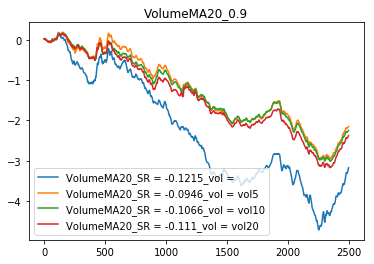


 *** evaluating factor : returnsVolumeMA5  with cut-off 0.3 with volality measure 

 *** evaluating factor : returnsVolumeMA5  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : returnsVolumeMA5  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : returnsVolumeMA5  with cut-off 0.3 with volality measure vol20


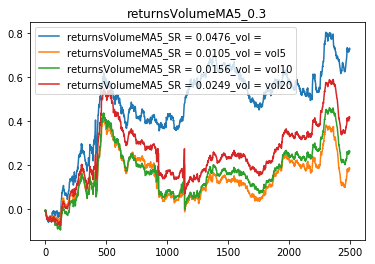


 *** evaluating factor : returnsVolumeMA10  with cut-off 0.3 with volality measure 

 *** evaluating factor : returnsVolumeMA10  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : returnsVolumeMA10  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : returnsVolumeMA10  with cut-off 0.3 with volality measure vol20


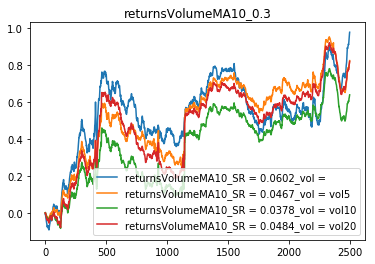


 *** evaluating factor : returnsVolumeMA20  with cut-off 0.9 with volality measure 

 *** evaluating factor : returnsVolumeMA20  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : returnsVolumeMA20  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : returnsVolumeMA20  with cut-off 0.9 with volality measure vol20


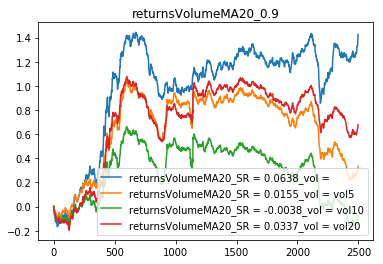


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.1 with volality measure vol20


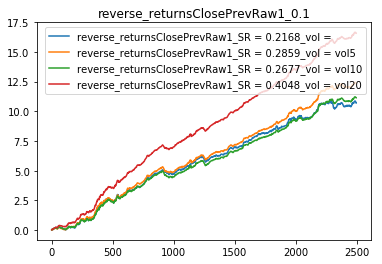


 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off 0.1 with volality measure vol20


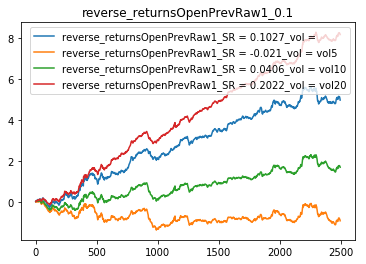


 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off 0.1 with volality measure vol20


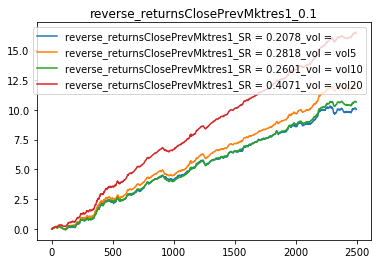


 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off 0.1 with volality measure vol20


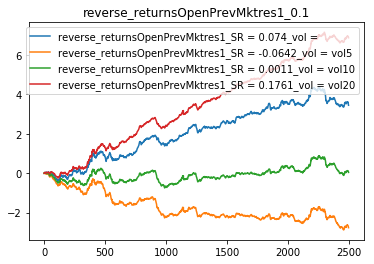


 *** evaluating factor : reverse_returnsCloseMA5  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_returnsCloseMA5  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_returnsCloseMA5  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_returnsCloseMA5  with cut-off 0.1 with volality measure vol20


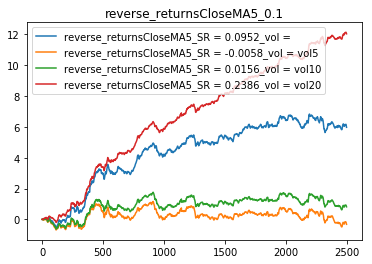


 *** evaluating factor : reverse_VolumeMA5  with cut-off 0.3 with volality measure 

 *** evaluating factor : reverse_VolumeMA5  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : reverse_VolumeMA5  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : reverse_VolumeMA5  with cut-off 0.3 with volality measure vol20


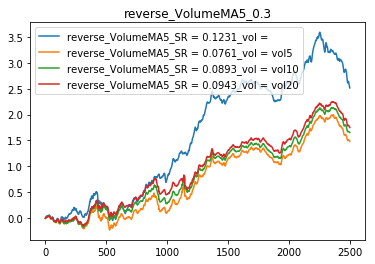


 *** evaluating factor : reverse_VolumeMA10  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_VolumeMA10  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_VolumeMA10  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_VolumeMA10  with cut-off 0.1 with volality measure vol20


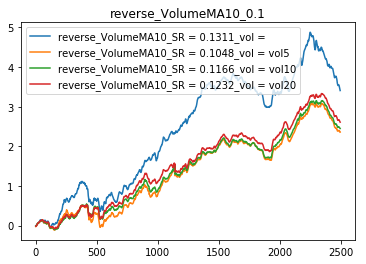


 *** evaluating factor : reverse_VolumeMA20  with cut-off 0.1 with volality measure 

 *** evaluating factor : reverse_VolumeMA20  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : reverse_VolumeMA20  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : reverse_VolumeMA20  with cut-off 0.1 with volality measure vol20


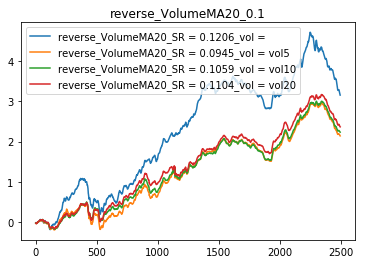


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off 0.7 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off 0.7 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off 0.7 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off 0.7 with volality measure vol20


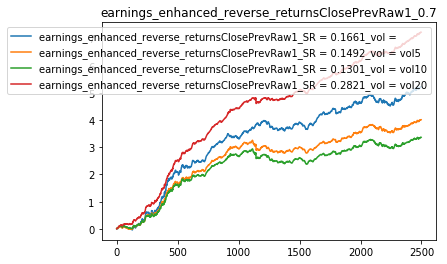


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off 0.9 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off 0.9 with volality measure vol20


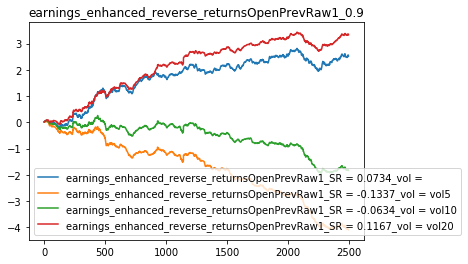


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off 0.3 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off 0.3 with volality measure vol20


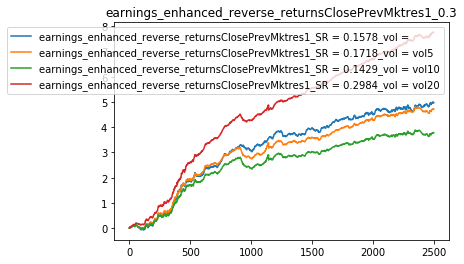


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off 0.9 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off 0.9 with volality measure vol20


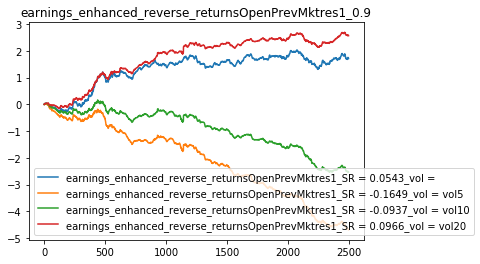


 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off 0.9 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off 0.9 with volality measure vol20


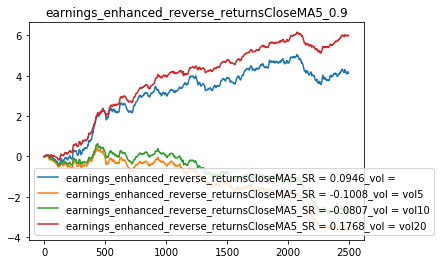


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off 0.3 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off 0.3 with volality measure vol20


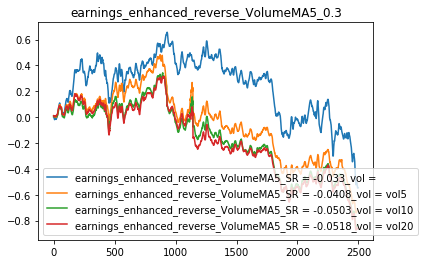


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off 0.9 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off 0.9 with volality measure vol20


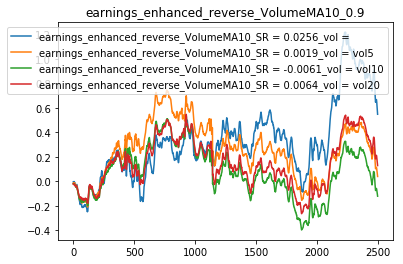


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off 0.9 with volality measure 

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off 0.9 with volality measure vol20


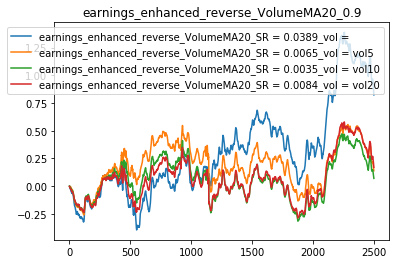


 *** evaluating factor : earning_period_flag  with cut-off 0.5 with volality measure 

 *** evaluating factor : earning_period_flag  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : earning_period_flag  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : earning_period_flag  with cut-off 0.5 with volality measure vol20


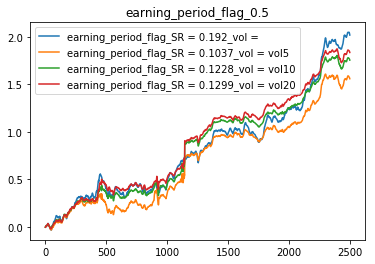


 *** evaluating factor : modified_earning_flag  with cut-off 0.7 with volality measure 

 *** evaluating factor : modified_earning_flag  with cut-off 0.7 with volality measure vol5

 *** evaluating factor : modified_earning_flag  with cut-off 0.7 with volality measure vol10

 *** evaluating factor : modified_earning_flag  with cut-off 0.7 with volality measure vol20


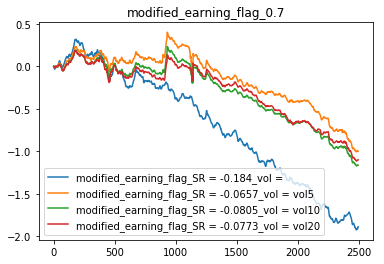


 *** evaluating factor : random_factor  with cut-off 0.9 with volality measure 

 *** evaluating factor : random_factor  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : random_factor  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : random_factor  with cut-off 0.9 with volality measure vol20


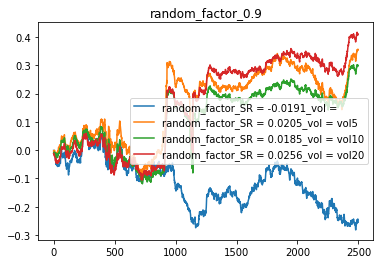


 *** evaluating factor : news_coverage_flag  with cut-off 0.9 with volality measure 

 *** evaluating factor : news_coverage_flag  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : news_coverage_flag  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : news_coverage_flag  with cut-off 0.9 with volality measure vol20


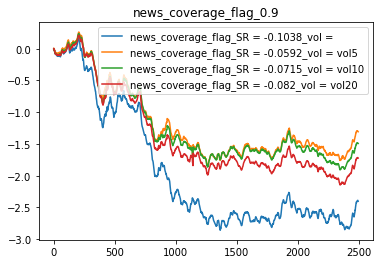


 *** evaluating factor : alert  with cut-off 0.1 with volality measure 

 *** evaluating factor : alert  with cut-off 0.1 with volality measure vol5

 *** evaluating factor : alert  with cut-off 0.1 with volality measure vol10

 *** evaluating factor : alert  with cut-off 0.1 with volality measure vol20


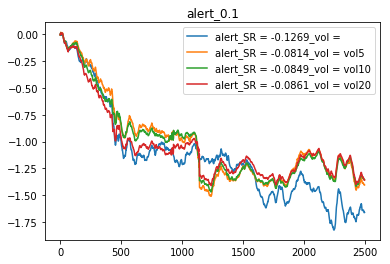


 *** evaluating factor : article  with cut-off 0.9 with volality measure 

 *** evaluating factor : article  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : article  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : article  with cut-off 0.9 with volality measure vol20


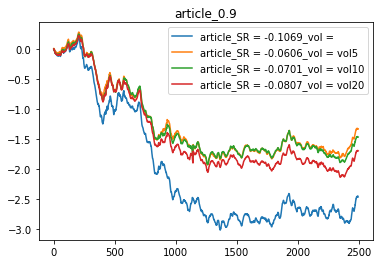


 *** evaluating factor : universe  with cut-off 0.7 with volality measure 

 *** evaluating factor : universe  with cut-off 0.7 with volality measure vol5

 *** evaluating factor : universe  with cut-off 0.7 with volality measure vol10

 *** evaluating factor : universe  with cut-off 0.7 with volality measure vol20


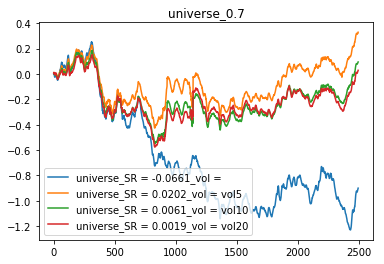


 *** evaluating factor : assetCodeLength  with cut-off 0.5 with volality measure 

 *** evaluating factor : assetCodeLength  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : assetCodeLength  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : assetCodeLength  with cut-off 0.5 with volality measure vol20


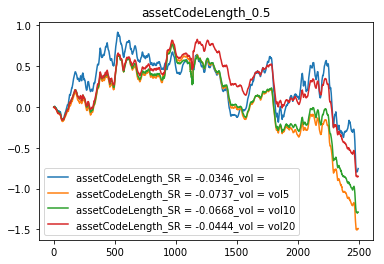


 *** evaluating factor : assetCode  with cut-off 0.3 with volality measure 

 *** evaluating factor : assetCode  with cut-off 0.3 with volality measure vol5

 *** evaluating factor : assetCode  with cut-off 0.3 with volality measure vol10

 *** evaluating factor : assetCode  with cut-off 0.3 with volality measure vol20


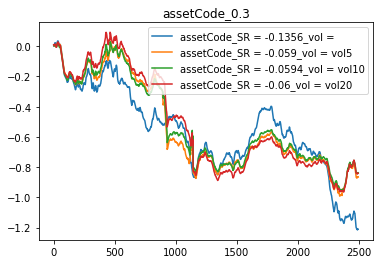


 *** evaluating factor : volume  with cut-off 0.7 with volality measure 

 *** evaluating factor : volume  with cut-off 0.7 with volality measure vol5

 *** evaluating factor : volume  with cut-off 0.7 with volality measure vol10

 *** evaluating factor : volume  with cut-off 0.7 with volality measure vol20


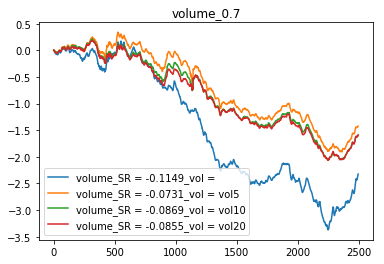


 *** evaluating factor : open  with cut-off 0.5 with volality measure 

 *** evaluating factor : open  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : open  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : open  with cut-off 0.5 with volality measure vol20


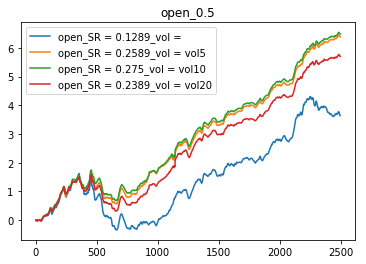


 *** evaluating factor : close  with cut-off 0.5 with volality measure 

 *** evaluating factor : close  with cut-off 0.5 with volality measure vol5

 *** evaluating factor : close  with cut-off 0.5 with volality measure vol10

 *** evaluating factor : close  with cut-off 0.5 with volality measure vol20


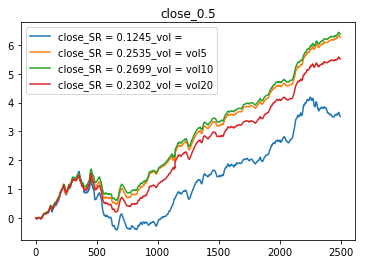


 *** evaluating factor : intraday_return  with cut-off 0.9 with volality measure 

 *** evaluating factor : intraday_return  with cut-off 0.9 with volality measure vol5

 *** evaluating factor : intraday_return  with cut-off 0.9 with volality measure vol10

 *** evaluating factor : intraday_return  with cut-off 0.9 with volality measure vol20


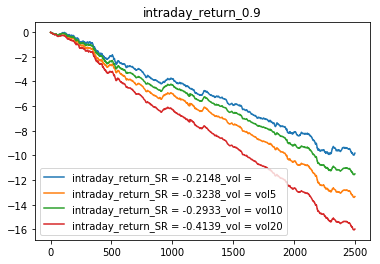

In [124]:
for signal in market_cutoff_dict:
    optimal_cutoff = sorted(market_cutoff_dict[signal].items(),key = lambda kv:np.abs(kv[1]))[-1][0]
    single_factor_eva(merged_factors, signal, cut_off =  optimal_cutoff )
    single_factor_eva(merged_factors, signal, cut_off =  optimal_cutoff, vol = 'vol5')
    single_factor_eva(merged_factors, signal, cut_off =  optimal_cutoff, vol = 'vol10')
    single_factor_eva(merged_factors, signal, cut_off =  optimal_cutoff, vol = 'vol20')
    plt.title(signal+"_"+str(optimal_cutoff))
    plt.legend()
    plt.savefig('./risk_parity_images/'+signal+"_"+str(optimal_cutoff)+'.png')
    plt.show()

### Evaluate market factors

In [43]:
list(merged_factors.columns)

['index',
 'Unnamed: 0',
 'time',
 'assetCode',
 'assetName',
 'volume',
 'close',
 'open',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevMktres1',
 'returnsOpenPrevMktres1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsClosePrevMktres10',
 'returnsOpenPrevMktres10',
 'returnsOpenNextMktres10_x',
 'universe',
 'returnsVolumePrev1',
 'returnsVolumePrev10',
 'CloseMA5',
 'CloseMA10',
 'CloseMA20',
 'returnsCloseMA5',
 'returnsCloseMA10',
 'returnsCloseMA20',
 'VolumeMA5',
 'VolumeMA10',
 'VolumeMA20',
 'returnsVolumeMA5',
 'returnsVolumeMA10',
 'returnsVolumeMA20',
 'date',
 'earning_period_flag',
 'reversal',
 'modified_earning_flag',
 'reverse_returnsClosePrevRaw1',
 'reverse_returnsOpenPrevRaw1',
 'reverse_returnsClosePrevMktres1',
 'reverse_returnsOpenPrevMktres1',
 'reverse_returnsCloseMA5',
 'reverse_VolumeMA5',
 'reverse_VolumeMA10',
 'reverse_VolumeMA20',
 'earnings_enhanced_reverse_returnsClosePrevRaw1',
 'earnings_enhanced_reverse_returnsOpen

In [8]:
tested_factors = list(merged_factors.columns)[8:52]
tested_factors.remove('universe')
tested_factors.remove('date')
tested_factors.remove('reversal')
tested_factors.remove('earning_period_flag')
tested_factors.remove('modified_earning_flag')
tested_factors.remove('returnsOpenNextMktres10_x')
print(tested_factors)

['returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevMktres1', 'returnsOpenPrevMktres1', 'returnsClosePrevRaw10', 'returnsOpenPrevRaw10', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10', 'returnsVolumePrev1', 'returnsVolumePrev10', 'CloseMA5', 'CloseMA10', 'CloseMA20', 'returnsCloseMA5', 'returnsCloseMA10', 'returnsCloseMA20', 'VolumeMA5', 'VolumeMA10', 'VolumeMA20', 'returnsVolumeMA5', 'returnsVolumeMA10', 'returnsVolumeMA20', 'reverse_returnsClosePrevRaw1', 'reverse_returnsOpenPrevRaw1', 'reverse_returnsClosePrevMktres1', 'reverse_returnsOpenPrevMktres1', 'reverse_returnsCloseMA5', 'reverse_VolumeMA5', 'reverse_VolumeMA10', 'reverse_VolumeMA20', 'earnings_enhanced_reverse_returnsClosePrevRaw1', 'earnings_enhanced_reverse_returnsOpenPrevRaw1', 'earnings_enhanced_reverse_returnsClosePrevMktres1', 'earnings_enhanced_reverse_returnsOpenPrevMktres1', 'earnings_enhanced_reverse_returnsCloseMA5', 'earnings_enhanced_reverse_VolumeMA5', 'earnings_enhanced_reverse_VolumeMA10'

In [4]:
(merged_factors['returnsOpenNextMktres10_x']).isnull().sum()

0

In [5]:
(merged_factors['returnsOpenNextMktres10_y']).isnull().sum()

3580140

In [121]:

# single factor evaluation in a functional way

'''
helper function for single_factor_eva
'''
# cutoff indicates the proportion of bottom portfolio
def single_factor_helper(df, score, cut_off, vol = ''):
    d = {}
    sorted_df = df.sort_values(score).reset_index(drop=True)
    index = int(len(sorted_df) * cut_off)
    if vol=='':
        short_portfolio = np.mean(sorted_df['returnsOpenNextMktres10_x'][:index])
        long_portfolio = np.mean(sorted_df['returnsOpenNextMktres10_x'][index:])
    else:
        short_portfolio = np.mean((sorted_df['returnsOpenNextMktres10_x']/sorted_df[vol])[:index])/np.mean((1/sorted_df[vol])[:index])
        long_portfolio = np.mean((sorted_df['returnsOpenNextMktres10_x']/sorted_df[vol])[index:])/np.mean((1/sorted_df[vol])[index:])
    d['daily_return'] = long_portfolio - short_portfolio
    return pd.Series(d, index=['daily_return'])

'''
evaluate how well a single factor performs given its column name and a cutoff
    e.g. when cutoff is set to be 0.9, it means we short top 10%, and long 90%
@param cut_off float
@param score str name of the factor
@param df dataframe which must contain score column and returnsOpenNextMktres10
return NaN only plot and statistics
'''

def single_factor_eva(df, score, cut_off=0.5, sector_code=None, all_on=False, vol = ''):
    
    print("\n *** evaluating factor :", score, " with cut-off", cut_off,'with volality measure',vol)
    if sector_code != None:
        print("\n *** sector: ", sector_code)
        factor_return = df.groupby('datetime').apply(lambda x: single_factor_helper(x, score, cut_off, vol))
        sector_return = df.groupby('datetime').apply(lambda x: single_factor_helper(x[x.sector == sector_code], score, cut_off, vol))
        print(" *** Overall Sharpe ratio:", float(factor_return.mean() / factor_return.std()))
        print(" *** Sector Sharpe ratio:", float(sector_return.mean() / sector_return.std()))
        factor_return['cumsum'] = factor_return.daily_return.cumsum()
        sector_return['cumsum'] = sector_return.daily_return.cumsum()
        plt.figure()
        plt.plot(list(factor_return['cumsum']), label = score+"_"+str(cut_off))
        plt.plot(list(sector_return['cumsum']), label = score+"_"+str(cut_off)+"_sector_" +str(sector_code))
        plt.legend()
        plt.savefig(score+"_"+str(cut_off)+"_sector_" +str(sector_code) +'.png')
        plt.show()
        return
    
    if all_on:
        plt.figure()
        cutoff_sharpe_dict = dict()
        for i in [0.1,0.3,0.5,0.7,0.9]:
            cutoff_return = df.groupby('datetime').apply(lambda x: single_factor_helper(x, score, i, vol))
            cutoff_sharpe = float(cutoff_return.mean() / cutoff_return.std())
            cutoff_sharpe_dict[i] = cutoff_sharpe
            cutoff_return['cumsum'] = cutoff_return.daily_return.cumsum()
            plt.plot(list(cutoff_return['cumsum']), label = str(i))
        plt.legend()
        title = ""
        for key in cutoff_sharpe_dict:
            title = title + str(key) + ": " + str(cutoff_sharpe_dict[key]) + "\n"
        plt.title(score+":\n"+title)
        plt.savefig('./cutoff_images/' + score + '.png', bbox_inches='tight')
        plt.show()    
        return cutoff_sharpe_dict
    
    factor_return = df.groupby('datetime').apply(lambda x: single_factor_helper(x, score, cut_off, vol))
    factor_sharpe = float(factor_return.mean() / factor_return.std())
    factor_return['cumsum'] = factor_return.daily_return.cumsum()
    #plt.figure()
    plt.plot(list(factor_return['cumsum']), label = score+'_SR = '+str(round(factor_sharpe,4))+'_vol = '+vol)
    #plt.title(score+"_"+str(cut_off))
    #plt.legend()
    #plt.savefig(score+"_"+str(cut_off)+'_'+vol+'.png')
    #plt.show()


 *** evaluating factor : returnsClosePrevRaw1  with cut-off 0.5


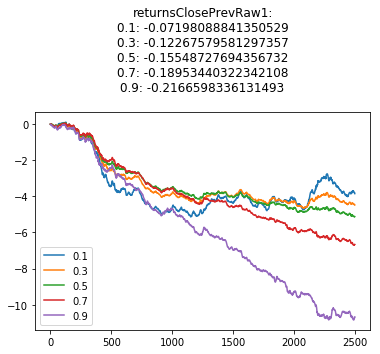


 *** evaluating factor : returnsOpenPrevRaw1  with cut-off 0.5


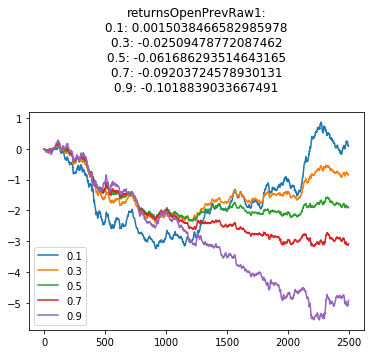


 *** evaluating factor : returnsClosePrevMktres1  with cut-off 0.5


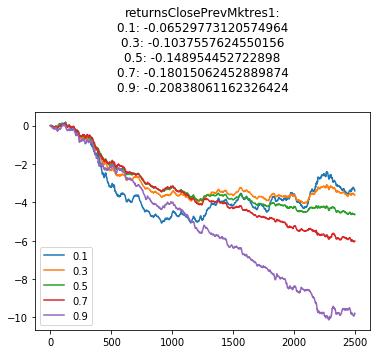


 *** evaluating factor : returnsOpenPrevMktres1  with cut-off 0.5


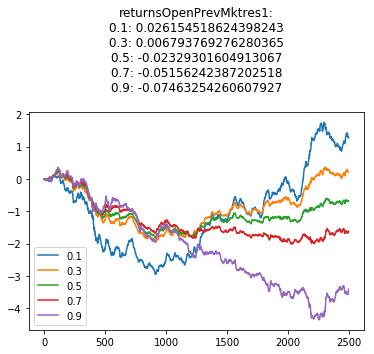


 *** evaluating factor : returnsClosePrevRaw10  with cut-off 0.5


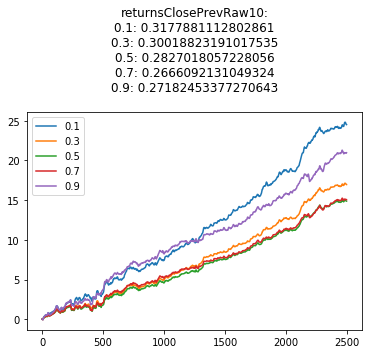


 *** evaluating factor : returnsOpenPrevRaw10  with cut-off 0.5


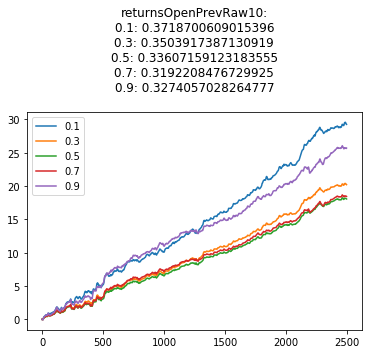


 *** evaluating factor : returnsClosePrevMktres10  with cut-off 0.5


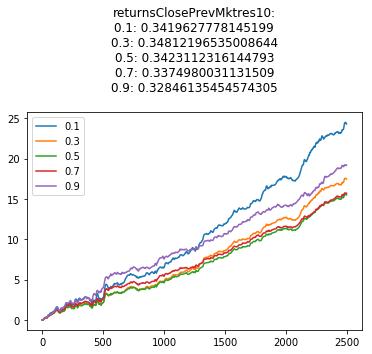


 *** evaluating factor : returnsOpenPrevMktres10  with cut-off 0.5


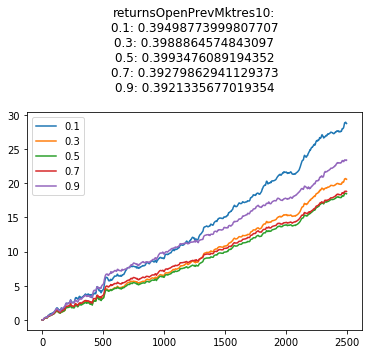


 *** evaluating factor : returnsOpenNextMktres10_x  with cut-off 0.5


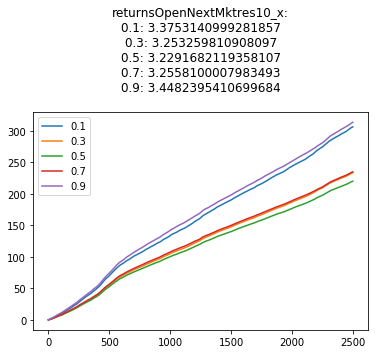


 *** evaluating factor : returnsVolumePrev1  with cut-off 0.5


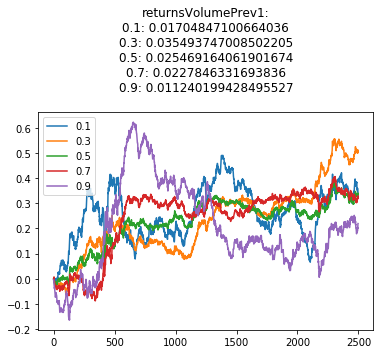


 *** evaluating factor : returnsVolumePrev10  with cut-off 0.5


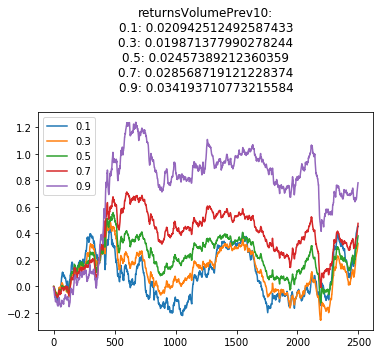


 *** evaluating factor : CloseMA5  with cut-off 0.5


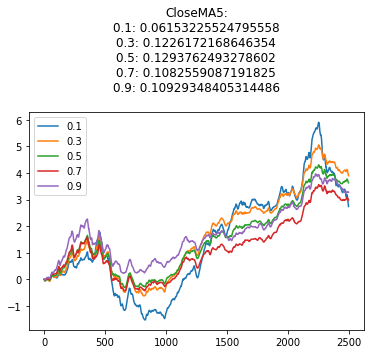


 *** evaluating factor : CloseMA10  with cut-off 0.5


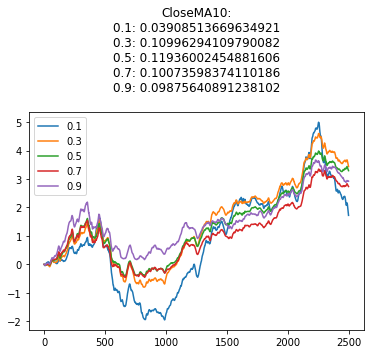


 *** evaluating factor : CloseMA20  with cut-off 0.5


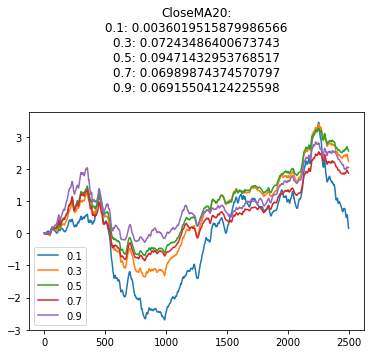


 *** evaluating factor : returnsCloseMA5  with cut-off 0.5


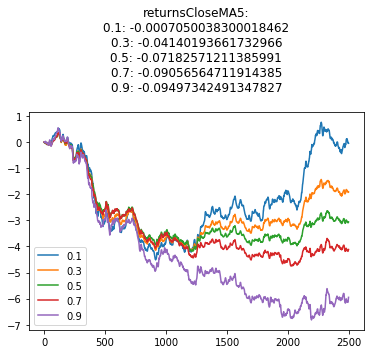


 *** evaluating factor : returnsCloseMA10  with cut-off 0.5


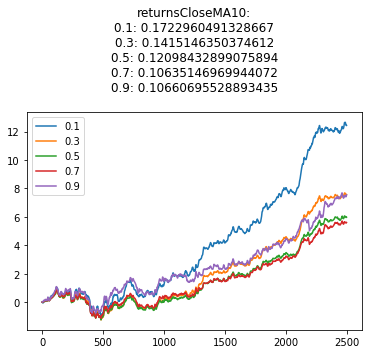


 *** evaluating factor : returnsCloseMA20  with cut-off 0.5


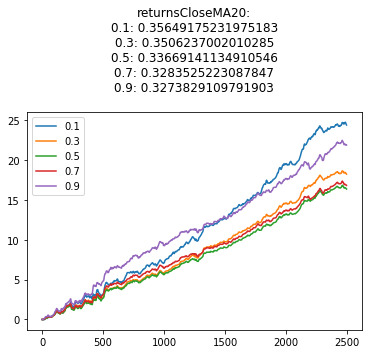


 *** evaluating factor : VolumeMA5  with cut-off 0.5


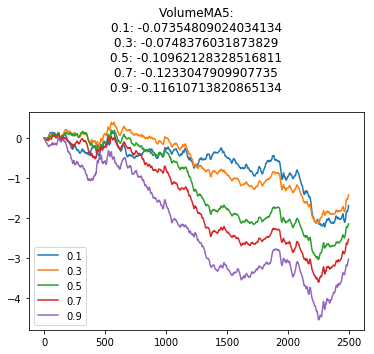


 *** evaluating factor : VolumeMA10  with cut-off 0.5


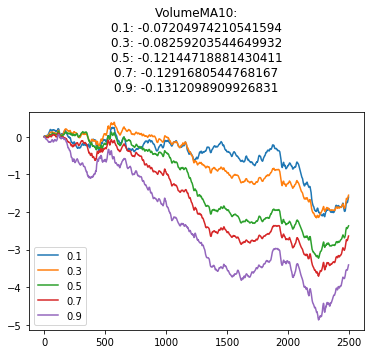


 *** evaluating factor : VolumeMA20  with cut-off 0.5


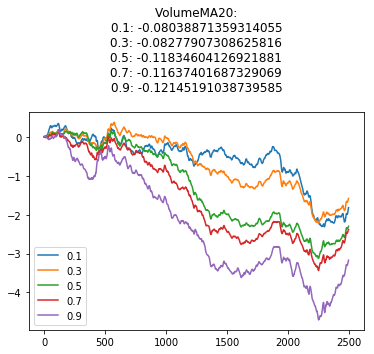


 *** evaluating factor : returnsVolumeMA5  with cut-off 0.5


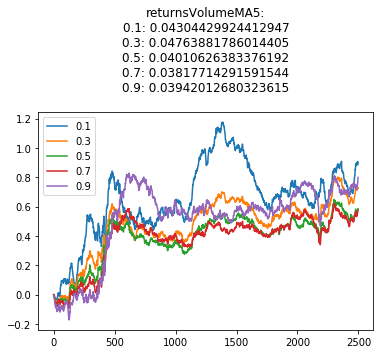


 *** evaluating factor : returnsVolumeMA10  with cut-off 0.5


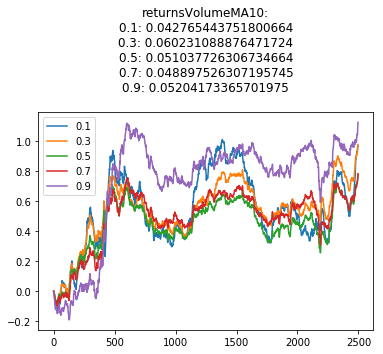


 *** evaluating factor : returnsVolumeMA20  with cut-off 0.5


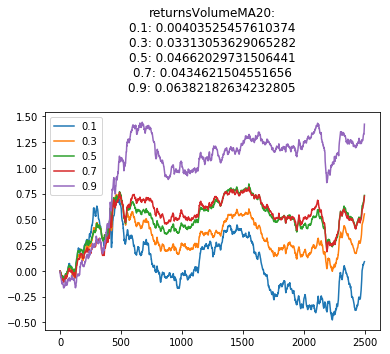


 *** evaluating factor : reverse_returnsClosePrevRaw1  with cut-off 0.5


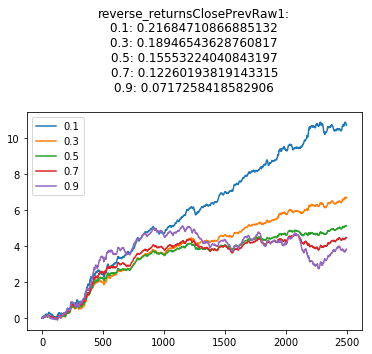


 *** evaluating factor : reverse_returnsOpenPrevRaw1  with cut-off 0.5


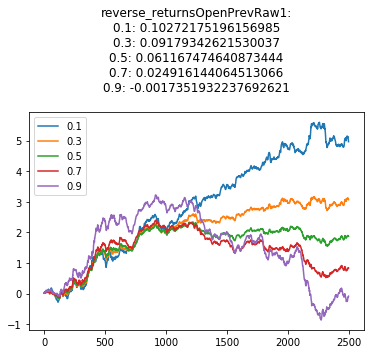


 *** evaluating factor : reverse_returnsClosePrevMktres1  with cut-off 0.5


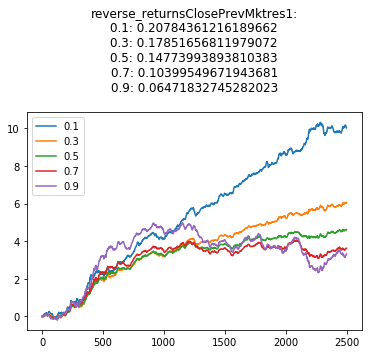


 *** evaluating factor : reverse_returnsOpenPrevMktres1  with cut-off 0.5


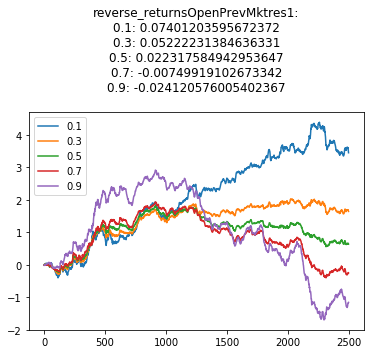


 *** evaluating factor : reverse_returnsCloseMA5  with cut-off 0.5


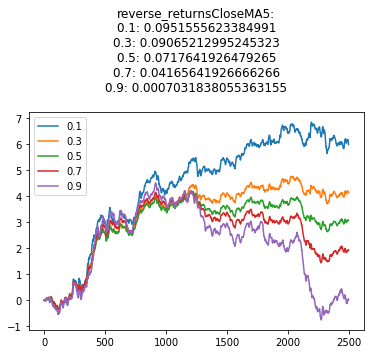


 *** evaluating factor : reverse_VolumeMA5  with cut-off 0.5


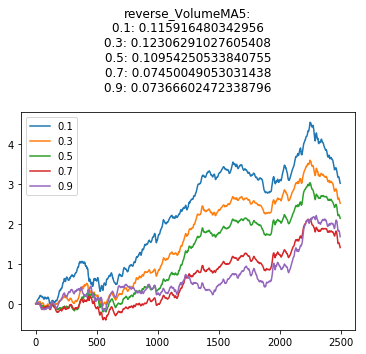


 *** evaluating factor : reverse_VolumeMA10  with cut-off 0.5


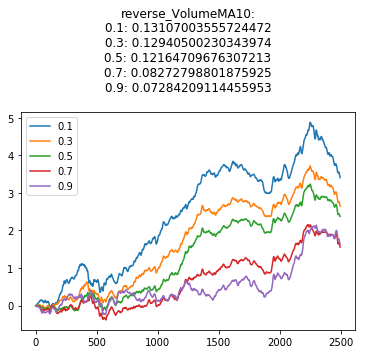


 *** evaluating factor : reverse_VolumeMA20  with cut-off 0.5


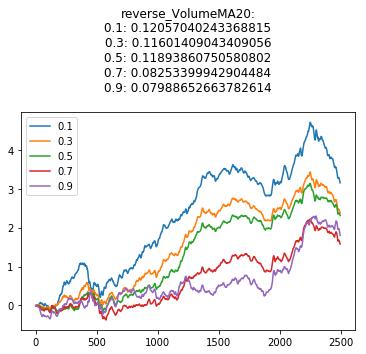


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevRaw1  with cut-off 0.5


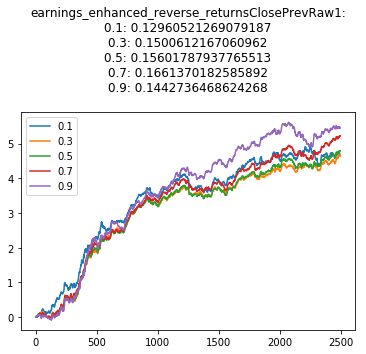


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevRaw1  with cut-off 0.5


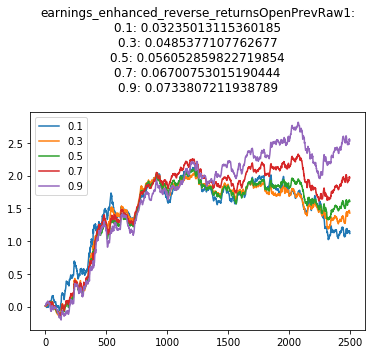


 *** evaluating factor : earnings_enhanced_reverse_returnsClosePrevMktres1  with cut-off 0.5


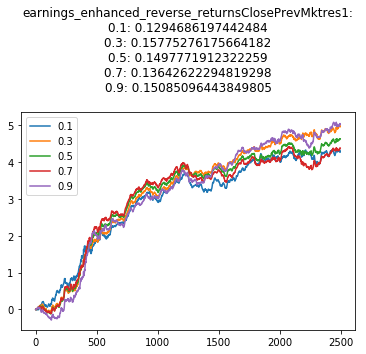


 *** evaluating factor : earnings_enhanced_reverse_returnsOpenPrevMktres1  with cut-off 0.5


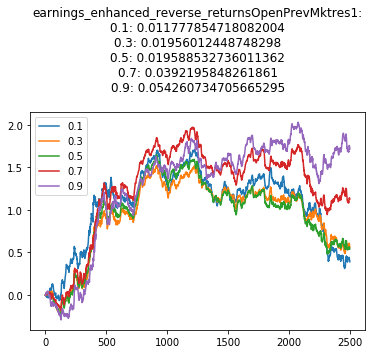


 *** evaluating factor : earnings_enhanced_reverse_returnsCloseMA5  with cut-off 0.5


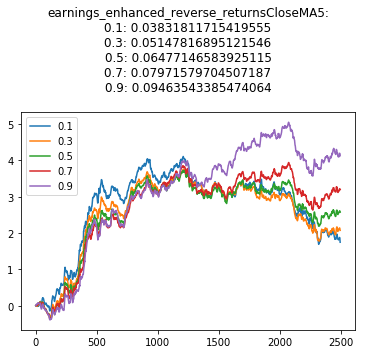


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA5  with cut-off 0.5


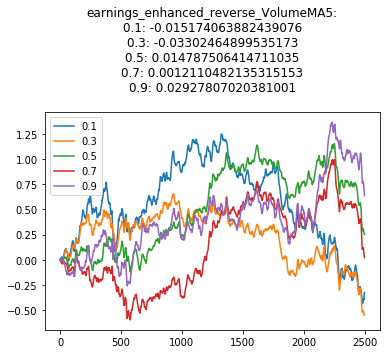


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA10  with cut-off 0.5


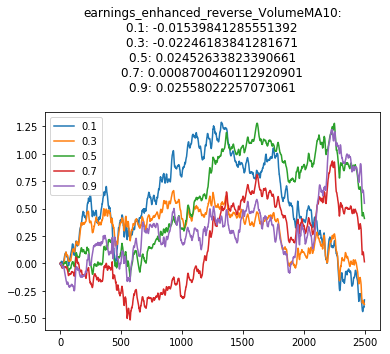


 *** evaluating factor : earnings_enhanced_reverse_VolumeMA20  with cut-off 0.5


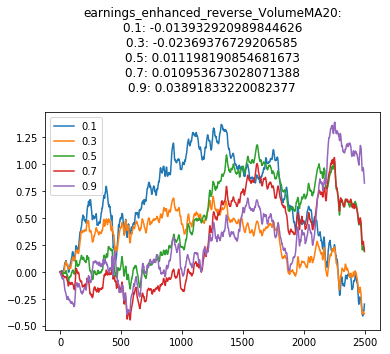

In [7]:
market_cutoff_dict = dict()

# Test continuous signals
for signal in tested_factors:
    try:
        market_cutoff_dict[signal] = single_factor_eva(merged_factors, signal, all_on=True)
    except:
        print('Error when testing factor: signal')


 *** evaluating factor : earning_period_flag  with cut-off 0.5


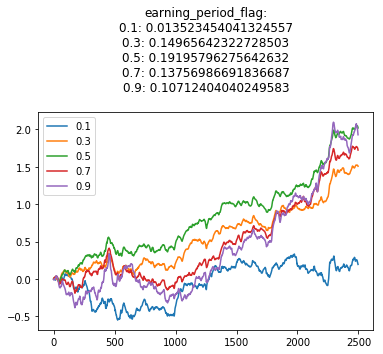


 *** evaluating factor : modified_earning_flag  with cut-off 0.5


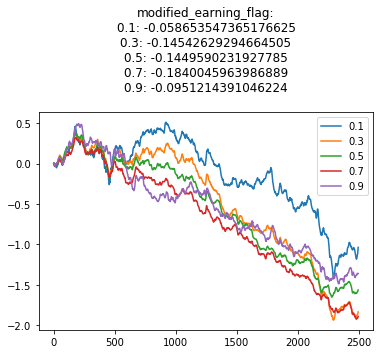

In [9]:
earning_flags = ['earning_period_flag', 'modified_earning_flag']

# Test continuous signals
for signal in earning_flags:
    try:
        market_cutoff_dict[signal] = single_factor_eva(merged_factors, signal, all_on=True)
    except:
        print('Error when testing factor: signal')


 *** evaluating factor : random_factor  with cut-off 0.5


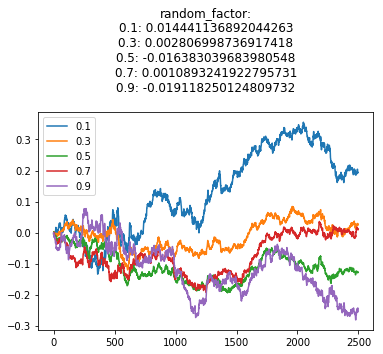

In [11]:
merged_factors['random_factor'] = np.random.randn(len(merged_factors))
market_cutoff_dict['random_factor'] = single_factor_eva(merged_factors, 'random_factor', all_on=True)

In [12]:
market_cutoff_dict

{'returnsClosePrevRaw1': {0.1: -0.07198088841350529,
  0.3: -0.12267579581297357,
  0.5: -0.15548727694356732,
  0.7: -0.18953440322342108,
  0.9: -0.2166598336131493},
 'returnsOpenPrevRaw1': {0.1: 0.0015038466582985978,
  0.3: -0.02509478772087462,
  0.5: -0.061686293514643165,
  0.7: -0.09203724578930131,
  0.9: -0.1018839033667491},
 'returnsClosePrevMktres1': {0.1: -0.06529773120574964,
  0.3: -0.1037557624550156,
  0.5: -0.148954452722898,
  0.7: -0.18015062452889874,
  0.9: -0.20838061162326424},
 'returnsOpenPrevMktres1': {0.1: 0.026154518624398243,
  0.3: 0.006793769276280365,
  0.5: -0.02329301604913067,
  0.7: -0.05156242387202518,
  0.9: -0.07463254260607927},
 'returnsClosePrevRaw10': {0.1: 0.3177881112802861,
  0.3: 0.30018823191017535,
  0.5: 0.2827018057228056,
  0.7: 0.2666092131049324,
  0.9: 0.27182453377270643},
 'returnsOpenPrevRaw10': {0.1: 0.3718700609015396,
  0.3: 0.3503917387130919,
  0.5: 0.33607159123183555,
  0.7: 0.3192208476729925,
  0.9: 0.32740570282647

In [30]:
def max_abs( kv ):
    return np.max(np.abs(list(kv[1].values())))

def mean_abs( kv ):
    return np.mean(np.abs(list(kv[1].values())))

In [40]:
len(market_factor_sorted_by_max)

42


 *** evaluating factor : news_coverage_flag  with cut-off 0.5


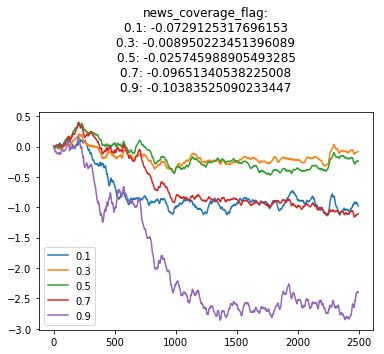

In [44]:
market_cutoff_dict['news_coverage_flag'] = single_factor_eva(merged_factors, 'news_coverage_flag', all_on=True)


 *** evaluating factor : alert  with cut-off 0.5


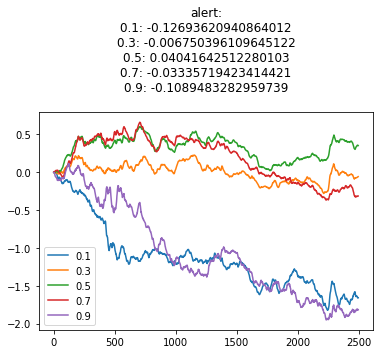


 *** evaluating factor : article  with cut-off 0.5


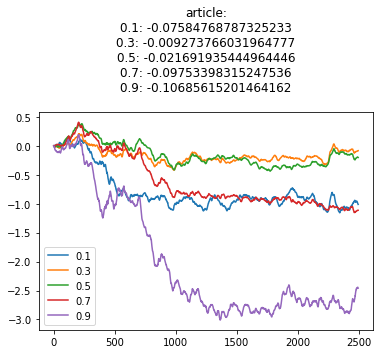

In [45]:
market_cutoff_dict['alert'] = single_factor_eva(merged_factors, 'alert', all_on=True)
market_cutoff_dict['article'] = single_factor_eva(merged_factors, 'article', all_on=True)


 *** evaluating factor : universe  with cut-off 0.5


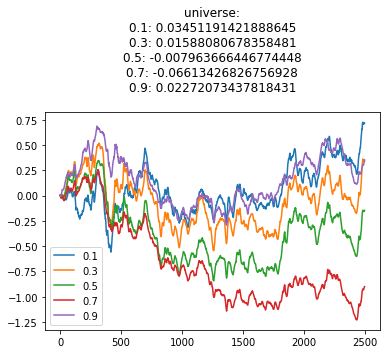

In [49]:
market_cutoff_dict['universe'] = single_factor_eva(merged_factors, 'universe', all_on=True)


 *** evaluating factor : assetCodeLength  with cut-off 0.5


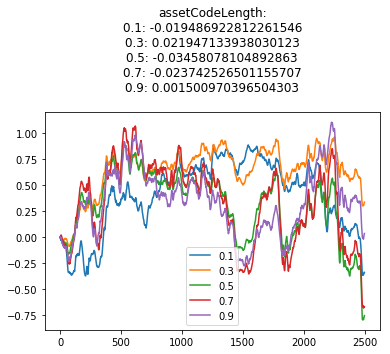

In [53]:
merged_factors['assetCodeLength'] = merged_factors['assetCode'].apply(len)
market_cutoff_dict['assetCodeLength'] = single_factor_eva(merged_factors, 'assetCodeLength', all_on=True)


 *** evaluating factor : assetCode  with cut-off 0.5


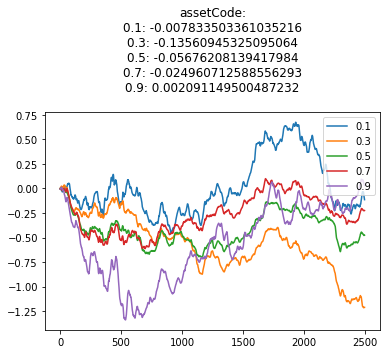

In [54]:
market_cutoff_dict['assetCode'] = single_factor_eva(merged_factors, 'assetCode', all_on=True)


 *** evaluating factor : volume  with cut-off 0.5


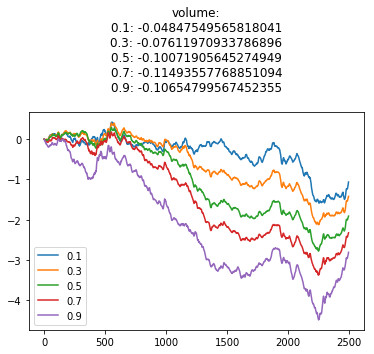

In [55]:
# Volume can be proxy for market cap
# The results indicate that small cap stocks generally outperform
market_cutoff_dict['volume'] = single_factor_eva(merged_factors, 'volume', all_on=True)


 *** evaluating factor : open  with cut-off 0.5


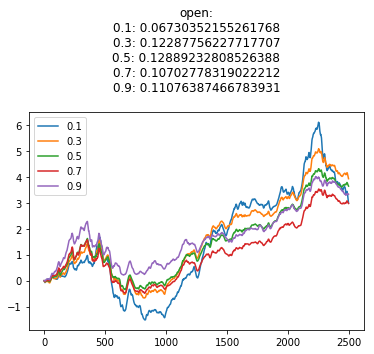


 *** evaluating factor : close  with cut-off 0.5


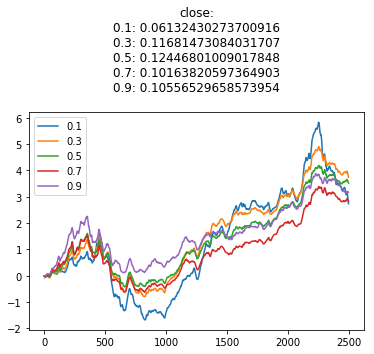

In [56]:
market_cutoff_dict['open'] = single_factor_eva(merged_factors, 'open', all_on=True)
market_cutoff_dict['close'] = single_factor_eva(merged_factors, 'close', all_on=True)


 *** evaluating factor : intraday_return  with cut-off 0.5


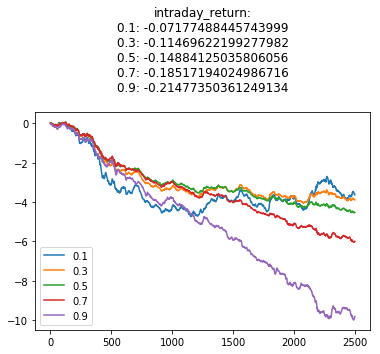

In [57]:
merged_factors['intraday_return'] = merged_factors['close']/merged_factors['open']-1.0
market_cutoff_dict['intraday_return'] = single_factor_eva(merged_factors, 'intraday_return', all_on=True)

### Final Ranking

In [58]:
from functools import reduce
# Sorted by max Sharpe ratio
market_factor_sorted_by_max = sorted(market_cutoff_dict.items(),key = max_abs,reverse = True)
market_factor_sorted_by_max = list(map(lambda x:(x[0],max_abs(x)),market_factor_sorted_by_max))
# Sorted by mean Sharpe ratio
market_factor_sorted_by_mean = sorted(market_cutoff_dict.items(),key = mean_abs,reverse = True)
market_factor_sorted_by_mean = list(map(lambda x:(x[0],mean_abs(x)),market_factor_sorted_by_mean))

In [59]:
market_factor_sorted_by_max

[('returnsOpenNextMktres10_x', 3.4482395410699684),
 ('returnsOpenPrevMktres10', 0.3993476089194352),
 ('returnsOpenPrevRaw10', 0.3718700609015396),
 ('returnsCloseMA20', 0.35649175231975183),
 ('returnsClosePrevMktres10', 0.34812196535008644),
 ('returnsClosePrevRaw10', 0.3177881112802861),
 ('reverse_returnsClosePrevRaw1', 0.21684710866885132),
 ('returnsClosePrevRaw1', 0.2166598336131493),
 ('intraday_return', 0.21477350361249134),
 ('returnsClosePrevMktres1', 0.20838061162326424),
 ('reverse_returnsClosePrevMktres1', 0.20784361216189662),
 ('earning_period_flag', 0.19195796275642632),
 ('modified_earning_flag', 0.1840045963986889),
 ('returnsCloseMA10', 0.1722960491328667),
 ('earnings_enhanced_reverse_returnsClosePrevRaw1', 0.1661370182585892),
 ('earnings_enhanced_reverse_returnsClosePrevMktres1', 0.15775276175664182),
 ('assetCode', 0.13560945325095064),
 ('VolumeMA10', 0.1312098909926831),
 ('reverse_VolumeMA10', 0.13107003555724472),
 ('CloseMA5', 0.1293762493278602),
 ('open'

In [60]:
market_factor_sorted_by_mean

[('returnsOpenNextMktres10_x', 3.312358332928082),
 ('returnsOpenPrevMktres10', 0.39563080070301027),
 ('returnsOpenPrevRaw10', 0.3409919882691875),
 ('returnsCloseMA20', 0.33990845943157216),
 ('returnsClosePrevMktres10', 0.33967106648759593),
 ('returnsClosePrevRaw10', 0.2878223791581812),
 ('returnsClosePrevRaw1', 0.15126763960132333),
 ('reverse_returnsClosePrevRaw1', 0.15123451308292304),
 ('earnings_enhanced_reverse_returnsClosePrevRaw1', 0.14921899477911185),
 ('intraday_return', 0.1470515601341278),
 ('earnings_enhanced_reverse_returnsClosePrevMktres1', 0.14485515202396143),
 ('returnsClosePrevMktres1', 0.14130783650716525),
 ('reverse_returnsClosePrevMktres1', 0.14056278867840963),
 ('returnsCloseMA10', 0.12955068762989239),
 ('modified_earning_flag', 0.12563297980158233),
 ('earning_period_flag', 0.11996634946917972),
 ('reverse_VolumeMA10', 0.10753844275741509),
 ('open', 0.10737301395462402),
 ('VolumeMA10', 0.10729338236714384),
 ('CloseMA5', 0.10621502284255571),
 ('Volum